In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Warmup

Let's look at user `139` and user `452`

- how many movies did they rate?
- what is their average rating?
- how would characterize their rating behavior?

In [11]:
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
ratings.sample(5)

,userId,movieId,rating,timestamp
15817,103,31658,4.5,1431969137
78848,489,4022,3.5,1333101709
80229,504,5902,4.5,1072065929
70535,449,2302,2.5,1053198998
12253,75,7001,4.0,1158968208


In [14]:
r_subset = ratings.set_index('userId').loc[[139, 452]]
r_subset

,movieId,rating,timestamp
userId,,,
139,19,1.0,1453924016
139,260,4.0,1453923975
139,1198,4.0,1453923978
139,3300,2.0,1453924450
139,3409,2.0,1453924610
...,...,...,...
452,4887,4.0,1019581023
452,4963,4.0,1013394745
452,5049,5.0,1019580646


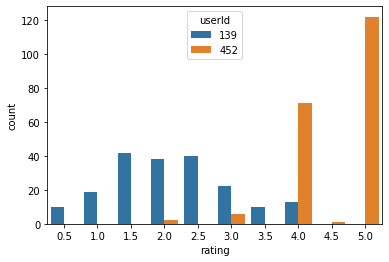

In [16]:
sns.countplot(x='rating', hue='userId', data=r_subset.reset_index())

# Recommender Systems
---

> Given our complete database of products, which particular products should we showcase to a certain user when she visits the website?

- help users to find relevant content
- reduce the time that is spent on actively searching for items
- help to keep users engaged 

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo(id="kPW75M5LhQk")

## Items 

The database that contains all content for recommendation

In [17]:
items = [
    'Titanic',
    'Lord of the Rings',
    'Godfather',
    'Pulp Fiction',
    'Dark Knight',
    'Shawshank Redemption',
    'Star Wars'
]

## Query

The context that is the input for the recommender system

### Content based filtering

> items' or users' characteristics as input

- length and genre of a movie
- age and gender of the user
- time of the day

In [ ]:
query = {
    'userId': 123,    
    'length': '120',
    'genre': 'thriller',
    'age': 34,
    'time': '20:45'          
}
query

### Collaborative filtering (core topic of this week!)

> users' explicit or implicit feedback as input

- similar items that you have liked in the past ...
- similar users also liked ...

In [ ]:
query = {
        'Titanic': 4,
        'Star Wars': 1,
        'Pulp Fiction': 5
}
query

---
## General Approach


#### 1. candidate generation

> create a subset of potential items

Example: 

- items the user hasn't already interacted with
- items watched more than 100 times
- items with an average rating above 4


#### 2. scoring

> given the query input, predict a score for each candidate item

Example: 

- the average rating of the top 10 most similar users

##### 3. ranking

> recommend the top 10 (5, 3, ..., k) items with the highest score


In [ ]:
# collaborative filtering = look at ratings only!
def recommend(query, ratings, model, k=10):
    """
    Filters and recommends the top k movies for any given input query. 
    Returns a list of k movie ids.
    """
    # 1. candiate generation
    
    # 2. scoring
    
    # 3. ranking
    
    return []

---

# Data representations for the user item matrix

- Long format
- User-item matrix
- Sparse matrix

### Long format

- efficient, as it only stores the non missing entries
- easy to add more columns to the data, like the movie title or some user information

In [19]:
ratings = pd.read_csv('../data/ml-latest-small/ratings.csv')
ratings.sample(5)

,userId,movieId,rating,timestamp
67253,434,6857,4.5,1270605213
10229,66,4465,4.0,1104644709
8674,59,1263,5.0,953609997
53571,353,457,5.0,831940127
22393,152,48516,3.5,1450867566


### User-item matrix (wide format) $R$

- format that is required to apply the unsupervised learning models (matrix factorization, clustering) 
- only works with small data: needs a lot of memory as it stores all the missings!
- additional information cannot be added

In [33]:
user_item = pd.pivot_table(ratings, 
                           values='rating', 
                           index='userId', 
                           columns='movieId'
)
user_item

movieId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,2.5,NaN,NaN,NaN,NaN,NaN,2.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
607,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
608,2.5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
# user_item.mean(axis=1)
user_item.transpose().mean()

userId
1      4.366379
2      3.948276
3      2.435897
4      3.555556
5      3.636364
         ...   
606    3.657399
607    3.786096
608    3.134176
609    3.270270
610    3.688556
Length: 610, dtype: float64

In [44]:
# calculate the fraction of missing entries (=sparsity)
np.mean(user_item.isna().values)

0.9830003169443864

### User item matrix as a sparse matrix

- CSR is an efficient format to store sparse matrices
- only keeps track of non missing elements
- matrix operations can still be applied
- many models in `sklearn` accept sparse matrices!

![](https://matteding.github.io/images/csr.gif)
> https://matteding.github.io/2019/04/25/sparse-matrices/#compressed-sparse-rowcolumn

In [25]:
from scipy.sparse import csr_matrix

In [45]:
# Initialize a sparse matrix 
# (data, (row_ind, col_ind)
user_item = csr_matrix((ratings['rating'], (ratings['userId'], ratings['movieId'])))
user_item

<611x193610 sparse matrix of type '<class 'numpy.float64'>'
	with 100836 stored elements in Compressed Sparse Row format>

In [28]:
ratings.shape

(100836, 4)

In [47]:
# user vector for user with id 1
user_item[1, :]

<1x193610 sparse matrix of type '<class 'numpy.float64'>'
	with 232 stored elements in Compressed Sparse Row format>

---
## Unsupervised Learning

> Learn patterns (probability distribution) of a data matrix (user item matrix) $R$.


#### Matrix Factorization (Dimensionality Reduction): NMF, PCA

> Derive a dense representation of the sparse rating vectors

- Explain users' ratings by looking at a reduced set of hidden features 


#### Clustering: nearest neighbors, k-means clustering

> Identify groups of similar users that share the same preferences

- Recommend items that other users of the cluster liked

#### Outlier/ Anomaly detection

> Identify users that don't follow the usual pattern (distribution) of the data

- Identify and remove bots that scrape your website for content

---
## Project Task: Your first recommenders

Implement a recommender function that recommends the most popular movies to a user! Work with either the movie ids or the movie titles.

In [ ]:
# collaborative filtering = look at ratings only!

def recommend_random(query, ratings, k=10):
    """
    Filters and recommends k random movies for any given input query.
    Returns a list of k movie ids    
    """
    # 1. candiate generation
    
    # filter out movies that the user has allready seen
    
    
    # 2. "scoring"
    
    # calculate a random sample of movies
    
    
    # 3. "ranking"
    
    # no ranking applied   
    

In [ ]:
def recommend_popular(query, ratings, k=10):
    """
    Filters and recommends the top k movies for any given input query. 
    Returns a list of k movie ids.
    """
    # 1. candiate generation
    
    # filter out movies that the user has allready seen
    
    # filter out movies that have been watched by less than 20/50/100... users
    
   
    # 2. scoring
    
    # calculate the average rating for each movie
    
    
    # 3. ranking
    
    # return the top-k highst rated movie ids or titles
    
    return [364, 372, 43, 34, 243]

In [ ]:
query = {
        #movieId: rating
        162: 4,
        23: 1,
        1: 5
}

recommend_popular(query, ratings)

In [ ]:
# recommender.py
# from recommender import recommend_popular